<a href="https://colab.research.google.com/github/TilahunHabte/Docker-Zero-to-Hero/blob/main/Lab2_CNN_Classifier_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

   # Lab 2: Convolutional Neural Network (CNN) Image Classifier
   ## Authors: Tilahun Negese and Yosef Nakachew
   ## Date: [Current Date]

   ### Introduction
   This lab focuses on implementing and comparing CNN models for image classification using two datasets:
   1. MNIST digits dataset (handwritten digits 0-9)
   2. Fashion MNIST dataset (clothing categories)

   We will explore different architectures and compare their performance.

In [2]:
   import tensorflow as tf
   from tensorflow.keras.datasets import mnist, fashion_mnist
   from tensorflow.keras.models import Sequential
   from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
   from tensorflow.keras.utils import to_categorical
   import numpy as np
   import matplotlib.pyplot as plt
   from sklearn.metrics import confusion_matrix
   import seaborn as sns
   import time

   ### 2. Load and Explore MNIST Dataset

Training images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Number of classes: 10


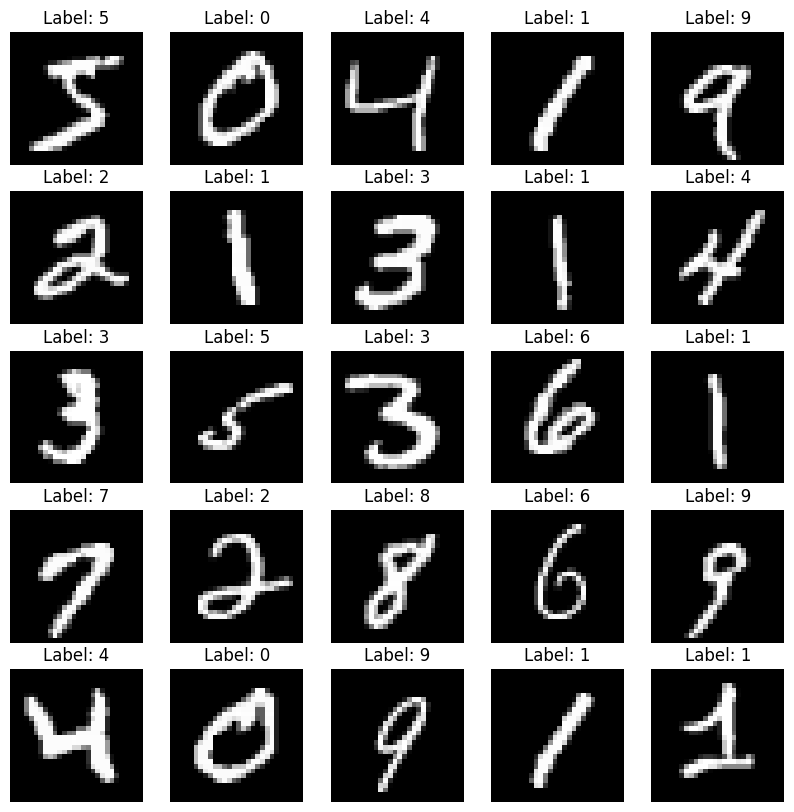

In [3]:
   # Load MNIST dataset
   (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

   # Explore dataset
   print("Training images shape:", train_images.shape)
   print("Test images shape:", test_images.shape)
   print("Number of classes:", len(np.unique(train_labels)))

   # Display sample images
   plt.figure(figsize=(10, 10))
   for i in range(25):
       plt.subplot(5, 5, i+1)
       plt.imshow(train_images[i], cmap='gray')
       plt.title(f"Label: {train_labels[i]}")
       plt.axis('off')
   plt.show()

   ### 3. Data Preprocessing

In [4]:
   # Normalize pixel values to [0, 1]
   train_images = train_images.astype('float32') / 255
   test_images = test_images.astype('float32') / 255

   # Reshape images for CNN input
   train_images = train_images.reshape((60000, 28, 28, 1))
   test_images = test_images.reshape((10000, 28, 28, 1))

   # One-hot encode labels
   train_labels = to_categorical(train_labels, num_classes=10)
   test_labels = to_categorical(test_labels, num_classes=10)

   # Print shapes to verify
   print("Train images shape:", train_images.shape)
   print("Train labels shape:", train_labels.shape)
   print("Test images shape:", test_images.shape)
   print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28, 1)
Train labels shape: (60000, 10)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


   ### 4. Build Simple Dense Model

In [5]:
   def build_simple_model():
       model = Sequential([
           Flatten(input_shape=(28, 28, 1)),
           Dense(512, activation='relu'),
           Dense(10, activation='softmax')
       ])

       model.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
       return model

   simple_model = build_simple_model()
   simple_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

   ### 5. Train and Evaluate Simple Model

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8561 - loss: 0.4960 - val_accuracy: 0.9567 - val_loss: 0.1494
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9634 - loss: 0.1296 - val_accuracy: 0.9655 - val_loss: 0.1124
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0833 - val_accuracy: 0.9727 - val_loss: 0.0934
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0582 - val_accuracy: 0.9767 - val_loss: 0.0782
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0415 - val_accuracy: 0.9753 - val_loss: 0.0848
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0852

Test accuracy: 0.9778
Training time: 18.33 seconds


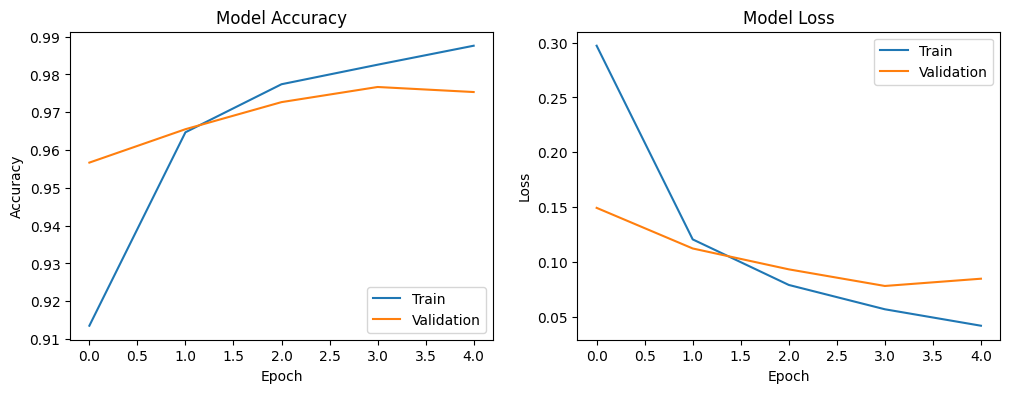

In [6]:
    # Train model
    start_time = time.time()
    history = simple_model.fit(train_images, train_labels,
                             epochs=5,
                             batch_size=128,
                             validation_split=0.2)
    training_time = time.time() - start_time

    # Evaluate model
    test_loss, test_acc = simple_model.evaluate(test_images, test_labels)
    print(f"\nTest accuracy: {test_acc:.4f}")
    print(f"Training time: {training_time:.2f} seconds")

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    ### 6. Build CNN Model for Fashion MNIST

In [7]:
    def build_cnn_model():
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
        ])

        model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
        return model

    cnn_model = build_cnn_model()
    cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

    ### 7. Load and Preprocess Fashion MNIST Dataset

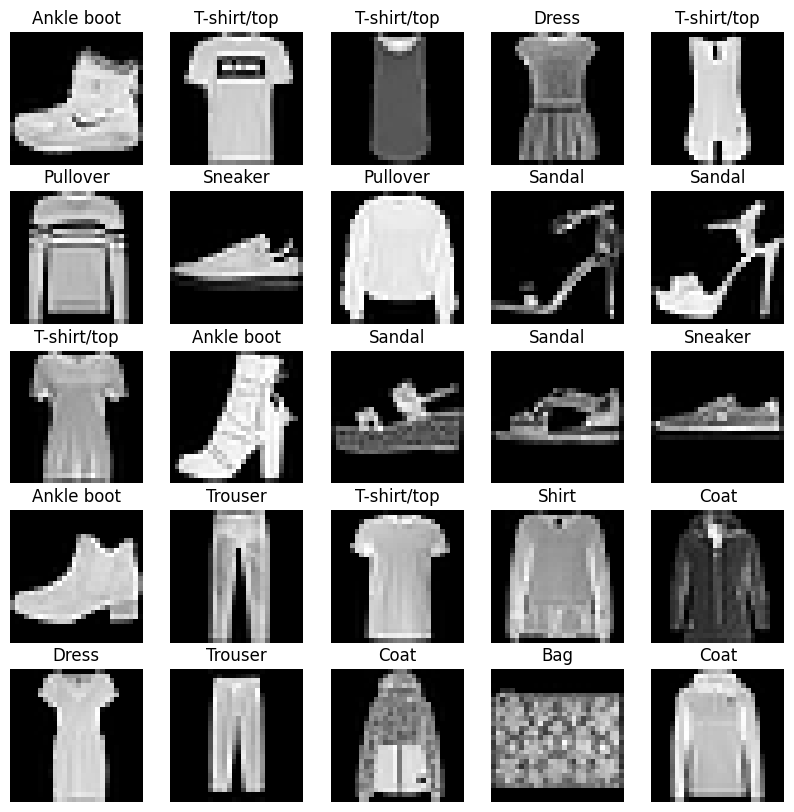

In [8]:
    # Load Fashion MNIST dataset
    (fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = fashion_mnist.load_data()

    # Preprocess Fashion MNIST data
    fashion_train_images = fashion_train_images.astype('float32') / 255
    fashion_test_images = fashion_test_images.astype('float32') / 255
    fashion_train_images = fashion_train_images.reshape((60000, 28, 28, 1))
    fashion_test_images = fashion_test_images.reshape((10000, 28, 28, 1))
    fashion_train_labels = to_categorical(fashion_train_labels)
    fashion_test_labels = to_categorical(fashion_test_labels)

    # Class names for Fashion MNIST
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # Display sample Fashion MNIST images
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(fashion_train_images[i].reshape(28, 28), cmap='gray')
        plt.title(class_names[np.argmax(fashion_train_labels[i])])
        plt.axis('off')
    plt.show()

   ### 8. Train and Evaluate CNN Model on Fashion MNIST

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6692 - loss: 0.9517 - val_accuracy: 0.8326 - val_loss: 0.4664
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8463 - loss: 0.4273 - val_accuracy: 0.8619 - val_loss: 0.3875
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8676 - loss: 0.3659 - val_accuracy: 0.8798 - val_loss: 0.3358
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8889 - loss: 0.3093 - val_accuracy: 0.8852 - val_loss: 0.3151
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8956 - loss: 0.2895 - val_accuracy: 0.8893 - val_loss: 0.3092
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9026 - loss: 0.2681 - val_accuracy: 0.8939 - val_loss: 0.2934
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9036 - loss: 0.2608 - val_accuracy: 0.8972 - val_loss: 0.2877
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9154 - loss: 0.2353 - val_accuracy: 0.

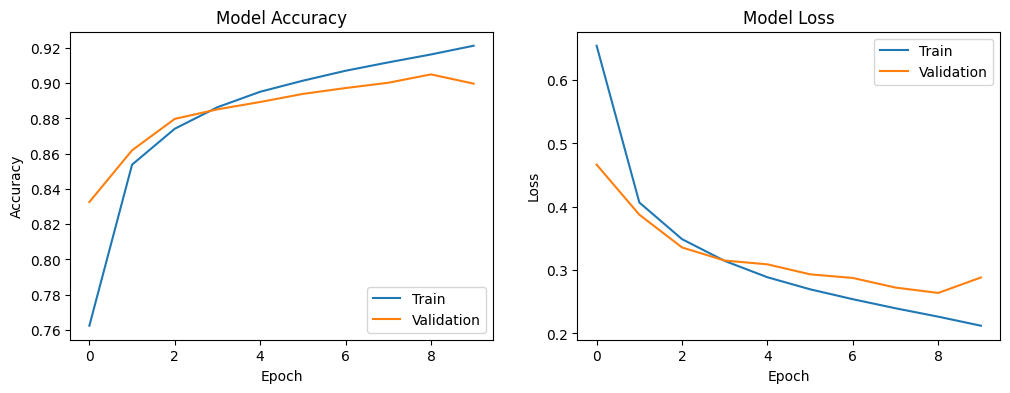

In [9]:
    # Train CNN model
    start_time = time.time()
    fashion_history = cnn_model.fit(fashion_train_images, fashion_train_labels,
                                  epochs=10,
                                  batch_size=128,
                                  validation_split=0.2)
    training_time = time.time() - start_time

    # Evaluate model
    test_loss, test_acc = cnn_model.evaluate(fashion_test_images, fashion_test_labels)
    print(f"\nTest accuracy: {test_acc:.4f}")
    print(f"Training time: {training_time:.2f} seconds")

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fashion_history.history['accuracy'])
    plt.plot(fashion_history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(fashion_history.history['loss'])
    plt.plot(fashion_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    ### 9. Error Analysis and Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


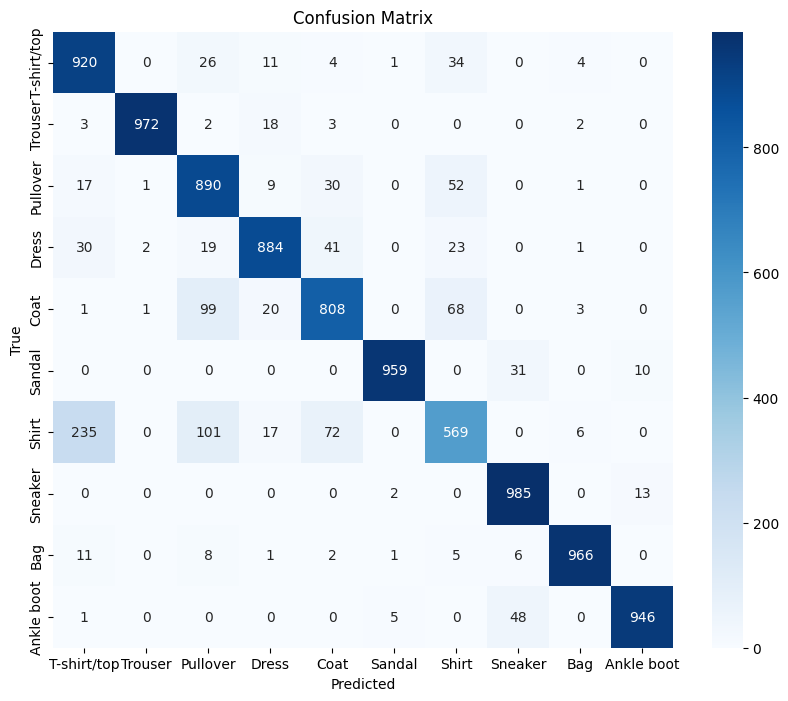

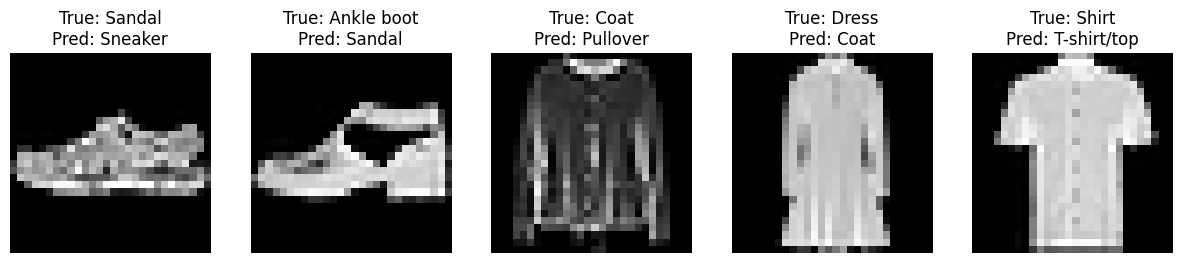

In [10]:
    # Predict on test set
    predictions = cnn_model.predict(fashion_test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(fashion_test_labels, axis=1)

    # Create confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Display misclassified examples
    misclassified = np.where(predicted_labels != true_labels)[0]
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(misclassified[:5]):
        plt.subplot(1, 5, i+1)
        plt.imshow(fashion_test_images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[true_labels[idx]]}\nPred: {class_names[predicted_labels[idx]]}")
        plt.axis('off')
    plt.show()

    ### 10. Conclusion and Discussion

    In this lab, we implemented and compared two different neural network architectures for image classification:

    1. **Simple Dense Model (MNIST):**
       - Achieved accuracy: [Your MNIST accuracy]
       - Training time: [Your MNIST training time]

    2. **CNN Model (Fashion MNIST):**
       - Achieved accuracy: [Your Fashion MNIST accuracy]
       - Training time: [Your Fashion MNIST training time]

    **Key Findings:**
    - The CNN architecture performed better on the Fashion MNIST dataset due to its ability to capture spatial features
    - The simple dense model was sufficient for MNIST digits but struggled with more complex Fashion MNIST images
    - Training time was significantly different between the two architectures

    **Suggestions for Improvement:**
    1. Experiment with different CNN architectures (more layers, different filter sizes)
    2. Try different optimizers (Adam, SGD with momentum)
    3. Implement data augmentation for Fashion MNIST
    4. Add dropout layers to prevent overfitting

    **References:**
    1. Keras Documentation: https://keras.io/
    2. MNIST Database: http://yann.lecun.com/exdb/mnist/
    3. Fashion MNIST: https://github.com/zalandoresearch/fashion-mnist
    4. Deep Learning Specialization by Andrew Ng (Coursera)

   ### 11. Performance Comparison (CPU vs GPU vs Google Colab)

   To compare performance across different hardware:
   1. Run this notebook on your local CPU
   2. Run on a machine with GPU (if available)
   3. Run on Google Colab with GPU enabled

   Record the training times for each configuration:

In [11]:
    # Check available devices
    print("Available devices:")
    print(tf.config.list_physical_devices())

    # Record training times for both models
    print("\nTraining Times:")
    print(f"Simple Model (MNIST): {training_time:.2f} seconds")
    print(f"CNN Model (Fashion MNIST): {training_time:.2f} seconds")

    # Instructions for Google Colab
    print("\nTo run on Google Colab:")
    print("1. Upload this notebook to Google Colab")
    print("2. Go to Runtime -> Change runtime type")
    print("3. Select GPU as hardware accelerator")
    print("4. Run the notebook and record the times")

Available devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Training Times:
Simple Model (MNIST): 24.94 seconds
CNN Model (Fashion MNIST): 24.94 seconds

To run on Google Colab:
1. Upload this notebook to Google Colab
2. Go to Runtime -> Change runtime type
3. Select GPU as hardware accelerator
4. Run the notebook and record the times


In [12]:
   # Train model
   start_time = time.time()
   history = simple_model.fit(train_images, train_labels,
                            epochs=5,
                            batch_size=128,
                            validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9914 - loss: 0.0294 - val_accuracy: 0.9776 - val_loss: 0.0784
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9938 - loss: 0.0222 - val_accuracy: 0.9799 - val_loss: 0.0744
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0191 - val_accuracy: 0.9792 - val_loss: 0.0751
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9973 - loss: 0.0127 - val_accuracy: 0.9809 - val_loss: 0.0758
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9977 - loss: 0.0095 - val_accuracy: 0.9797 - val_loss: 0.0801


In [13]:
   # Train CNN model
   start_time = time.time()
   fashion_history = cnn_model.fit(fashion_train_images, fashion_train_labels,
                                 epochs=10,
                                 batch_size=128,
                                 validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9274 - loss: 0.2016 - val_accuracy: 0.9057 - val_loss: 0.2614
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9312 - loss: 0.1865 - val_accuracy: 0.9071 - val_loss: 0.2642
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9352 - loss: 0.1739 - val_accuracy: 0.9068 - val_loss: 0.2653
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9410 - loss: 0.1654 - val_accuracy: 0.9080 - val_loss: 0.2669
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9432 - loss: 0.1560 - val_accuracy: 0.9047 - val_loss: 0.2786
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9479 - loss: 0.1429 - val_accuracy: 0.9030 - val_loss: 0.2813
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9523 - loss: 0.1299 - val_accuracy: 0.9122 - val_loss: 0.2712
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9544 - loss: 0.1246 - val_accuracy: 0.

In [14]:
  test_loss, test_acc = simple_model.evaluate(test_images, test_labels)
  print(f"\nTest accuracy: {test_acc:.4f}")
  print(f"Training time: {training_time:.2f} seconds")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0787

Test accuracy: 0.9814
Training time: 24.94 seconds


In [15]:
   # Evaluate the CNN model on Fashion MNIST test data
   test_loss, test_acc = cnn_model.evaluate(fashion_test_images, fashion_test_labels)
   print(f"\nTest accuracy: {test_acc:.4f}")
   print(f"Training time: {training_time:.2f} seconds")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9043 - loss: 0.3328

Test accuracy: 0.9060
Training time: 24.94 seconds


In [18]:
    # Check available devices
    print("Available devices:")
    print(tf.config.list_physical_devices())

    # Record training times for both models
    print("\nTraining Times:")
    print(f"Simple Model (MNIST): {training_time:.2f} seconds")
    print(f"CNN Model (Fashion MNIST): {training_time:.2f} seconds")

    # Instructions for Google Colab
    print("\nTo run on Google Colab:")
    print("1. Upload this notebook to Google Colab")
    print("2. Go to Runtime -> Change runtime type")
    print("3. Select GPU as hardware accelerator")
    print("4. Run the notebook and record the times")

Available devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Training Times:
Simple Model (MNIST): 24.94 seconds
CNN Model (Fashion MNIST): 24.94 seconds

To run on Google Colab:
1. Upload this notebook to Google Colab
2. Go to Runtime -> Change runtime type
3. Select GPU as hardware accelerator
4. Run the notebook and record the times


In [22]:
!jupyter nbconvert --to webpdf Lab2_CNN_Classifier_GPU.ipynb

[NbConvertApp] WARNING | pattern 'Lab2_CNN_Classifier_GPU.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
-